/var/folders/6s/h5hh29jn1dqd4r627s043vy40000gn/T/ipykernel_12743/2020513915.py:38: RuntimeWarning: invalid value encountered in divide
  R_unit = R/d                #se calcula el vector unitario en la dirección R
/var/folders/6s/h5hh29jn1dqd4r627s043vy40000gn/T/ipykernel_12743/2020513915.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  E=(q/d**2)


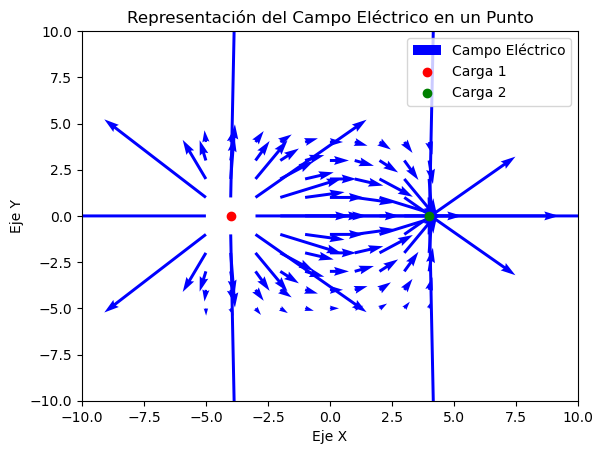

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#********************************************************
# Función para calcular el campo eléctrico,
#ingresa la carga y la distancia

def campo(q,d):

   # E=(1/(4*np.pi*8.854187817E-12))*(q/d**2)
    E=(q/d**2)
    return E
#********************************************************

r1=np.array([-4.0,0.0])          #posición de la carga 1
r2=np.array([4.0,0])             #posición de la carga 2
q1 = +12#e-9
q2= -12#e-9

flechas_electricas = []    #lista vacia para almacenar los valores calculados
                           # y despues graficar

for i in np.arange(-5,5,1) :
    for j in np.arange(-5,5,1):


        punto = np.array([j,i])       #punto donde se quiere calcular el campo

        #********************************************************
        #función para calcular la distancia entre dos puntos y
        #calcular el vector unitario
        def distancia(r,punto):
            resultado=[]                #se crea una lista vacia
            R= punto-r                  #se calcula el vector entre la carga y el punto
            d=np.sqrt(R[0]**2 + R[1]**2)# se calcula la magnitud de R o distancia
            resultado.append(d)         #se agrega la distancia a la lista
            #print(np.linalg.norm(R))
            R_unit = R/d                #se calcula el vector unitario en la dirección R
            resultado.append(R_unit)    #se agrega este vector unitario a la lista

            return resultado            #se retorna la lista con los valores calculados

        resultado1 = distancia(r1,punto)#se calcula el vector unitario a lo largo de la
                                        #linea que une q1 y el punto asi como la distancia

        resultado2 = distancia(r2,punto)#se calcula el vector unitario a lo largo de la
                                        #linea que une q2 con el punto asi como la distancia

        E1=campo(q1,resultado1[0])   #se calcula E1 ingresando
                                        #el valor de la carga y la distancia

        E2=campo(q2,resultado2[0])  #se calcula E2 ingresando el valor de la carga
                                        #y la distancia

        E_total = E1*resultado1[1] + E2*resultado2[1]

        flechas_electricas.append([punto[0], punto[1], E_total[0], E_total[1]])

        #print("La magnitud de E1:",E1,"La magnitud de E2: ",E2)
        #print("El vector E1 :",E1*resultado1[1])#se multiplica E1 por el vector unitario
        #print("El vector E2: ",E2*resultado2[1])#se multiplica E2 por el vector unitario

        #print("E_total: ",E_total)# campo total en el punto

 #**********************************************************************************

 #Graficos


# Crear la figura y el eje
fig, ax = plt.subplots()

# Dibujar el vector campo eléctrico como una flecha
ax.quiver(*zip(*flechas_electricas), angles='xy', scale_units='xy', scale=1, color='blue', linewidth=0.5, label='Campo Eléctrico')


# Dibujar las esferas que representan las cargas puntuales
ax.scatter(r1[0],r1[1], color='red', label='Carga 1')
ax.scatter(r2[0],r2[1], color='green', label='Carga 2')


# Definir los límites del gráfico
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

# Etiquetas de los ejes y título
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_title('Representación del Campo Eléctrico en un Punto')

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()